In [1]:
import time
import numpy as np

import matplotlib.pyplot as plt

from crispy.psf import GaussianPSFCube
from crispy.crispy_core import IFS

from crispy.utils import nearest
from crispy.utils import calculate_bin_edges

%matplotlib inline

In [2]:
# define wavelength array to simulated flatfield images
# following the starting from scratch notebook


# basic ifs parameters
lamc=660.
BW = 0.18
step = 5
dlam = 1
lammin=lamc * (1. - BW / 2.)
lammax=lamc * (1. + BW / 2.)
lamlist = np.arange(lammin,lammax + step, step)
# lamlist = lamc*np.linspace(1.-BW/2.,1.+BW/2.,fileshape[0])

# wavelengths = np.array([600,605,610, ])
# wavelengths = np.linspace(600, 752, 50)

# lam_ref = (752+600)//2
# gaussian_psfs = GaussianPSFCube(wavelengths, lam_ref, fwhm=2)
# lammin, lammax = 600, 752

# ifs = IFS(lam_ref, nlens=101, interlace=2, npix=1024)

In [3]:
lamlist

array([600.6, 605.6, 610.6, 615.6, 620.6, 625.6, 630.6, 635.6, 640.6,
       645.6, 650.6, 655.6, 660.6, 665.6, 670.6, 675.6, 680.6, 685.6,
       690.6, 695.6, 700.6, 705.6, 710.6, 715.6, 720.6])

In [4]:
ifs_kwargs = dict(
    lam_ref=lamc,
    R=50,
    nlens=108,
    pitch=0.000174,
    interlace=2,
    slens=0.5,
    npix=1024,
    pixsize=1.3e-05,
    fwhm=2,
    npixperdlam=2.0)

ifs = IFS(**ifs_kwargs)

In [5]:
images = ifs.propagate_main(lamlist, dlam=dlam, parallel=True, image_test=None)

progating images with dlam=1 nm
Parallel processing return the follow order:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Ellapsed time: 11.04096794128418


In [5]:
images = ifs.propagate_main(lamlist, dlam=dlam, parallel=True, image_test=None)

progating images with dlam=1 nm
Parallel processing return the follow order:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Ellapsed time: 8.934003353118896


In [6]:
13.25/8.93

1.4837625979843225

In [7]:
(8.93-13.25) / 13.25 * 100

-32.60377358490566

In [7]:
len(images)

25

In [8]:
images[0].shape

(1044, 1044)

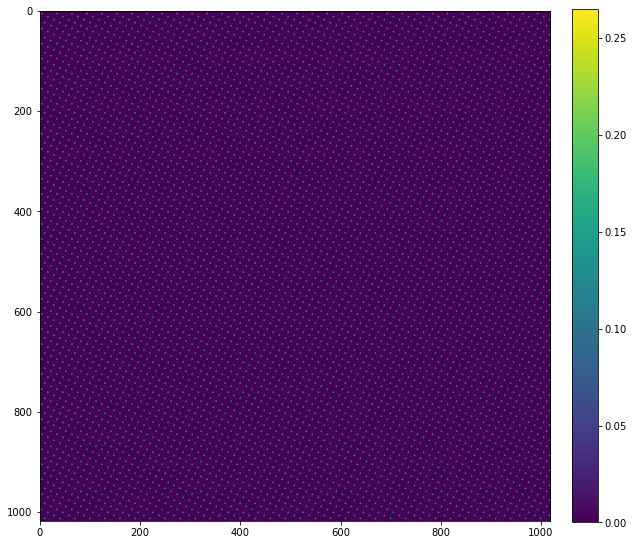

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(images[0][13:-13, 13:-13])
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

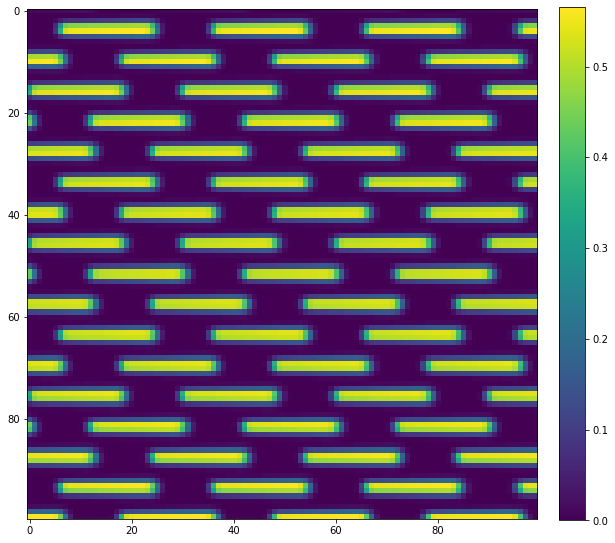

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(images.sum(0)[21:-21, 21:-21][450:550,450:550])
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

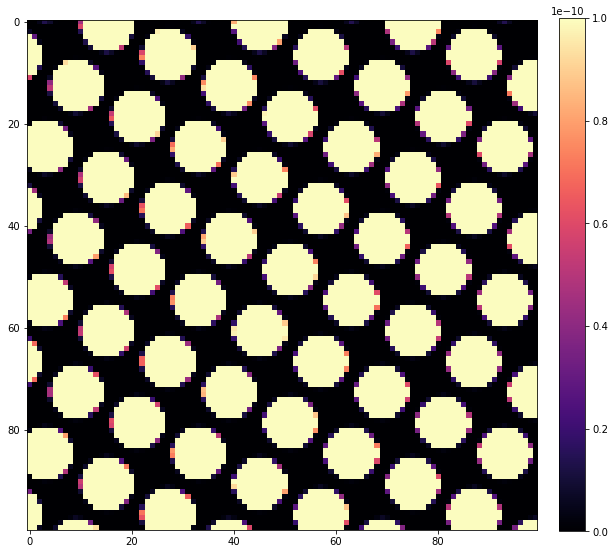

In [24]:
plot_log = False
cmap=plt.cm.magma
plt.figure(figsize=(10,10))
if plot_log:
    data = np.log10(images[0][450:550,450:550])
else:
    data =  images[0][450:550,450:550]         
plt.imshow(data, cmap=cmap, vmax=1e-10)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

<ipython-input-12-3e56623c3c00>:4: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(images[0][450:550,450:550])


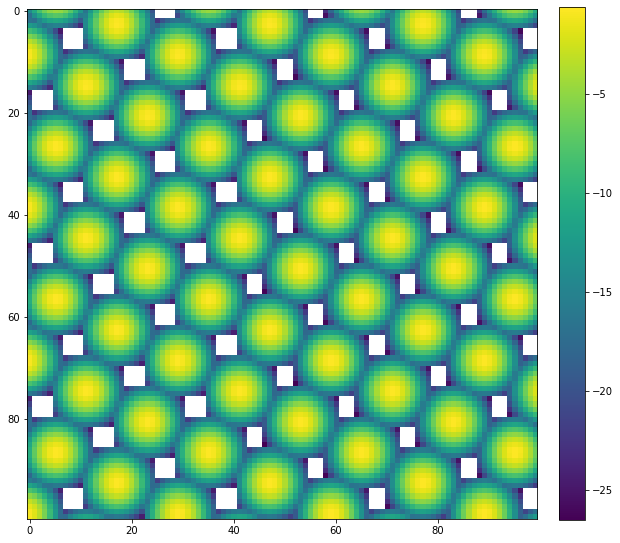

In [12]:
plot_log = True
plt.figure(figsize=(10,10))
if plot_log:
    data = np.log10(images[0][450:550,450:550])
else:
    data =  images[0][450:550,450:550]         
plt.imshow(data)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [11]:
ifs_image = ifs.propagate_main(lamlist, parallel=True, image_test=None)

Parallel processing return the follow order:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Ellapsed time: 11.321476936340332


In [12]:
ifs_image.shape

(25, 1044, 1044)

In [13]:
ifs_image_test = ifs_image.sum(0)

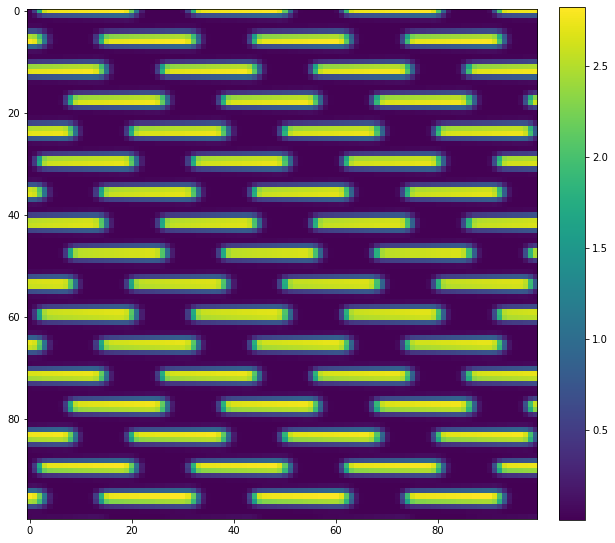

In [14]:
plt.figure(figsize=(10,10))
# plt.imshow(images.sum(0)[21:-21, 21:-21][450:550,450:550])
plt.imshow(ifs_image_test[21:-21, 21:-21][450:550,450:550])
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

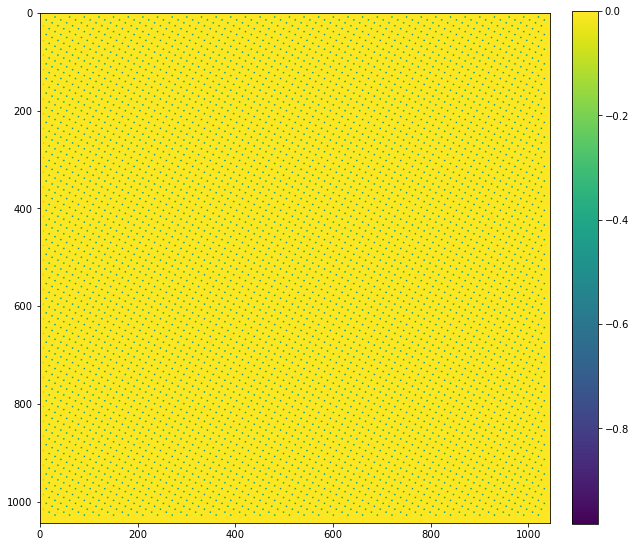

In [17]:
plt.figure(figsize=(10,10))
# plt.imshow(images.sum(0)[21:-21, 21:-21][450:550,450:550])
plt.imshow(images[0]-ifs_image[0])
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()